<a href="https://colab.research.google.com/github/vincentlam13/code/blob/master/monte_carlo_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#The Monte Carlo Simulation Tutorial

This notebook follows the tutorial from:
https://towardsai.net/monte-carlo-simulation

## What is the Monte Carlo Simulation?
A Monte Carlo method is a technique that uses random numbers and probability to solve complex problems. The Monte Carlo simulation, or probability simulation, is a technique used to understand the impact of risk and uncertainty in financial sectors, project management, costs, and other forecasting machine learning models.

Risk analysis is part of almost every decision we make, as we constantly face uncertainty, ambiguity, and variability in our lives. Moreover, even though we have unprecedented access to information, we cannot accurately predict the future.

The Monte Carlo simulation allows us to see all the possible outcomes of our decisions and assess risk impact, in consequence allowing better decision making under uncertainty.

### Applications:
- Finance
- Project Management
- Energy
- Manufacturing
- Engineering
- R&D
- Insurance
- Oil & gas
- Transportation
- Environment

This botebook will go through the following examples:
1. Coin flip
2. Monty Hall problem
3. BUffon's Needle problem
4. Why does the house always win?


## 1. Coin Flip Example
The probability of head for a fair coin is 1/2. However, is there any way we can prove it experimentally? In this example, we are going to use the Monte-Carlo method to simulate the coin-flipping iteratively 5000 times to find out why the probability of a head or tail is always 1/2. If we repeat this coin flipping many, many more times, then we can achieve higher accuracy on an exact answer for our probability value.

Final value : 0.4998


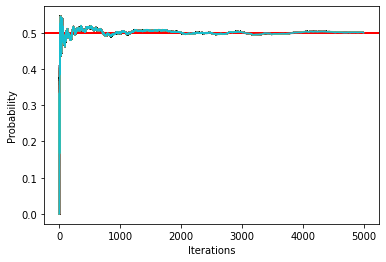

In [1]:
# 1. Coin Flip Example
#Import required libraries :

import random
import numpy as np
import matplotlib.pyplot as plt

#Coin flip function :

#0 --> Heads
#1 --> Tails

def coin_flip():
    return random.randint(0,1) 

#Monte Carlo Simulation :

#Empty list to store the probability values.
list1 = []

def monte_carlo(n):
    results = 0
    for i in range(n):
        flip_result = coin_flip()
        results = results + flip_result
        
        #Calculating probability value :
        prob_value = results/(i+1)
        
        #Append the probability values to the list :
        list1.append(prob_value)

        #Plot the results :
        plt.axhline(y=0.5, color='r', linestyle='-')
        plt.xlabel("Iterations")
        plt.ylabel("Probability")
        plt.plot(list1)
       
    return results/n
  
#Calling the function :

answer = monte_carlo(5000)
print("Final value :",answer)

Figure above shows that after 5000 iterations, the probability of getting a tail is 0.4998. Consequently, this is how we can use the Monte Carlo Simulation to find probabilities experimentally.

## 2. Monty Hall Problem
Suppose you are on a game show, and you have the choice of picking one of three doors: Behind one door is a car; behind the other doors, goats. You pick a door, let’s say door 1, and the host, who knows what’s behind the doors, opens another door, say door 3, which has a goat. The host then asks you: do you want to stick with your choice or choose another door?



Winning probability if you always switch: 0.668
Winning probability if you always stick to your original choice: 0.332


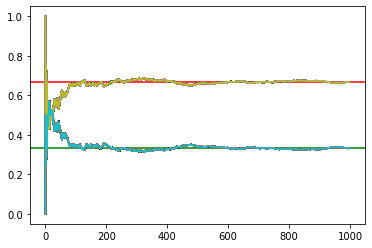

In [3]:
# 2. Monty Hall Problem
#Import required libraries :
import random
import matplotlib.pyplot as plt

#We are going with 3 doors :
#1 - Car
#2 - Goats
doors = ["goat","goat","car"]

#Empty lists to store probability values :
switch_win_probability = []
stick_win_probability = []

plt.axhline(y=0.66666, color='r', linestyle='-')
plt.axhline(y=0.33333, color='g', linestyle='-')

#Monte_Carlo Simulation :
def monte_carlo(n):
    
    #Calculating switch and stick wins :
    switch_wins = 0
    stick_wins = 0
    
    for i in range(n):
    
        #Randomly placing the car and goats behind the three doors :
        random.shuffle(doors) 
        
        #Contestant's choice :
        k = random.randrange(2)  

        #If the contestant doesn't get car :
        if doors[k] != 'car': 
            switch_wins += 1
            
        #If the contestant got car :
        else: 
            stick_wins += 1

        #Updating the list values :
        switch_win_probability.append(switch_wins/(i+1))
        stick_win_probability.append(stick_wins/(i+1))
        
        #Plotting the data :
        plt.plot(switch_win_probability)
        plt.plot(stick_win_probability)
        
    #Print the probability values :
    print('Winning probability if you always switch:',switch_win_probability[-1])
    print('Winning probability if you always stick to your original choice:', stick_win_probability[-1])


#Calling the function :
monte_carlo(1000)

## 3. Buffon's Needle Problem
A French nobleman Georges-Louis Leclerc, Comte de Buffon, posted the following problem in 1777 

Suppose that we drop a short needle on a ruled paper — what would be the probability that the needle comes to lie in a position where it crosses one of the lines?

The probability depends on the distance (d) between the lines of the ruled paper, and it depends on the length (l) of the needle that we drop — or rather, it depends on the ratio l/d. For this example, we can interpret the needle as l ≤ d. In short, our purpose is that the needle cannot cross two different lines at the same time. Surprisingly, the answer to the Buffon’s needle problem involves PI.

Here we are going to use the solution of Buffon’s needle problem to estimate the value of PI experimentally using the Monte Carlo Method. However, before going into that, we are going to show how the solution derives, making it more interesting.


3.1418876460977754


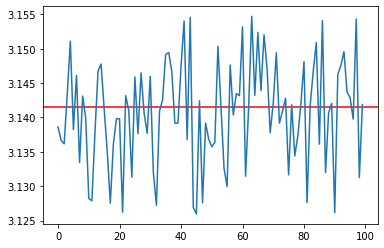

In [4]:
#3. Buffon's Needle Problem
# Import required libraries :
import random
import math
import matplotlib.pyplot as plt

#Main function to estimate PI value :
def monte_carlo(runs,needles,n_length,b_width):
    #Empty list to store pi values :
    pi_values = []
    
    #Horizontal line for actual value of PI :
    plt.axhline(y=math.pi, color='r', linestyle='-')
    
    #For all runs :
    for i in range(runs):
        #Initialize number of hits as 0.
        nhits = 0
        
        #For all needles :
        for j in range(needles):
            #We will find the distance from the nearest vertical line :
            #Min = 0     Max = b_width/2
            x = random.uniform(0,b_width/2.0)
            
            #The theta value will be from 0 to pi/2 :
            theta = random.uniform(0,math.pi/2)
            
            #Checking if the needle crosses the line or not :
            xtip  = x - (n_length/2.0)*math.cos(theta)  
            if xtip < 0 :
                nhits += 1
                
        #Going with the formula :
        numerator = 2.0 * n_length * needles
        denominator = b_width * nhits
       
        #Append the final value of pi :
        pi_values.append((numerator/denominator))
    
    #Final pi value after all iterations :
    print(pi_values[-1])
    
    #Plotting the graph :
    plt.plot(pi_values)    
        
#Total number of runs :
runs = 100

#Total number of needles :
needles = 100000

#Length of needle :
n_length = 2  

#space between 2 verical lines :
b_width =2

#Calling the main function :
monte_carlo(runs,needles,n_length,b_width)

## 4. Why Does the House Always Win?
How do casinos earn money? The trick is straightforward — “The more you play, the more they earn.” Let us take a look at how this works with a simple Monte Carlo Simulation example.

Consider an imaginary game in which a player has to choose a chip from a bag of chips.

In [5]:
# 4. Why Does the House Always Win?
#Import required libraries :

import random
import matplotlib.pyplot as plt

Rules:
1. There are chips containing numbers ranging from 1–100 in a bag.
2. Users can bet on even or odd chips.
3. In this game, 10 and 11 are special numbers. If we bet on evens, then 10 will be counted as an odd number, and if we bet on odds, then 11 will be counted as an even number.
4. If we bet on even numbers and we get 10 then we lose.
5. If we bet on odd numbers and we get 11 then we lose.

If we bet on odds, the probability that we will win is of 49/100. The probability that the house wins is of 51/100. Therefore, for an odd bet the house edge is = 51/100–49/100 = 200/10000 = 0.02 = 2%

If we bet on evens, the probability that the user wins is of 49/100. The probability that the house wins is of 51/100. Hence, for an odd bet the house edge is = 51/100–49/100 = 200/10000 = 0.02 = 2%

In summary, for every $ 1 bet, $ 0.02 goes to the house. In comparison, the lowest house edge on roulette with a single 0 is 2.5%. Consequently, we are certain that you will have a better chance of winning at our imaginary game than with roulette.

In [6]:
#Place your bet:

#User can choose even or odd number :
choice = input("Do you want to bet on Even number or Odd number \n")

#For even :
if choice=="Even":
    def pickNote():
        #Get random number between 1-100.
        note = random.randint(1,100)
       
        #Check for our game conditions.
        
        #Notice that 10 isn't considered as even number.
        if note%2!=0 or note==10:
            return False
        elif note%2==0:
            return True

#For odd :        
elif choice=="Odd":
    def pickNote():
        #Get random number between 1-100.
        note = random.randint(1,100)
        
        #Check for our game conditions.
        
        #Notice that 11 isn't considered as odd number.
        if note%2==0 or note==11:
            return False
        elif note%2==1:
            return True  

Do you want to bet on Even number or Odd number 
Even


In [7]:
#Main function :
def play(total_money, bet_money, total_plays):

    num_of_plays = []
    money = []
    
    #Start with play number 1
    play = 1
  
    for play in range(total_plays):
        #Win :
        if pickNote():
            #Add the money to our funds
            total_money = total_money + bet_money
            #Append the play number
            num_of_plays.append(play)
            #Append the new fund amount
            money.append(total_money)
        
        #Lose :
        else:
            #Add the money to our funds
            total_money = total_money - bet_money 
            #Append the play number
            num_of_plays.append(play)
            #Append the new fund amount
            money.append(total_money)
    
    #Plot the data :
    plt.ylabel('Player Money in $')
    plt.xlabel('Number of bets')
    plt.plot(num_of_plays,money)

    #Final value after all the iterations :
    final_funds.append(money[-1])
    return(final_funds)

[9200, 9600, 8800, 9600, 8800, 10000, 10800, 10200, 9600, 9200]
95800
The player started with $10,000
The player left with $ 9580.0


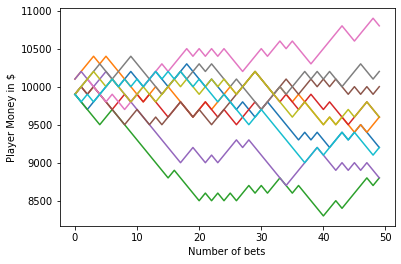

In [9]:
#Create a list for calculating final funds
final_funds= []

#Run 10 iterations :
for i in range(10):
    ending_fund = play(10000,100,50)
    
print(ending_fund)
print(sum(ending_fund))

#Print the money the player ends with
print("The player started with $10,000")
print("The player left with $",str(sum(ending_fund)/len(ending_fund)))

The player started with $10,000
The player left with $ 9916.2


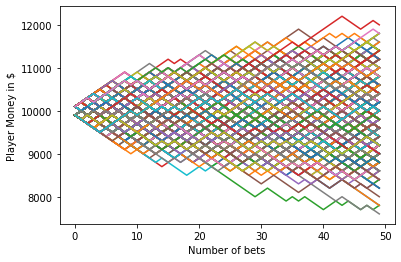

In [10]:
#Create a list for calculating final funds
final_funds= []

#Run 1000 iterations :
for i in range(1000):
    ending_fund = play(10000,100,50)

#Print the money the player ends with
print("The player started with $10,000")
print("The player left with $",str(sum(ending_fund)/len(ending_fund)))

Number of bets = 5
The player started with $10,000
The player left with $ 10020.0


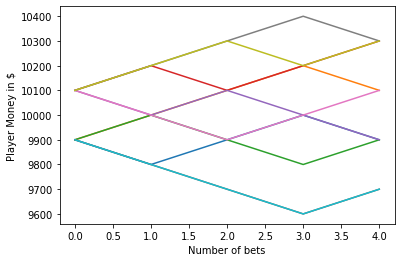

In [11]:
#Create a list for calculating final funds
final_funds= []

#Run 10 iterations :
for i in range(10):
    ending_fund = play(10000,100,5)

#Print the money the player ends with
print("Number of bets = 5")
print("The player started with $10,000")
print("The player left with $",str(sum(ending_fund)/len(ending_fund)))

Number of bets = 100
The player started with $10,000
The player left with $ 9800.0


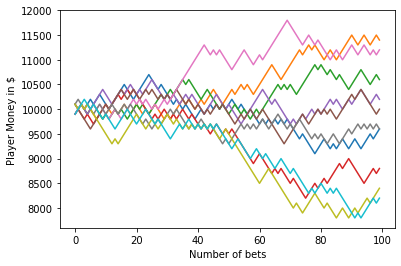

In [12]:
#Create a list for calculating final funds
final_funds= []

#Run 10 iterations :
for i in range(10):
    ending_fund = play(10000,100,100)

#Print the money the player ends with
print("Number of bets = 100")
print("The player started with $10,000")
print("The player left with $",str(sum(ending_fund)/len(ending_fund)))

Number of bets = 1000
The player started with $10,000
The player left with $ 8440.0


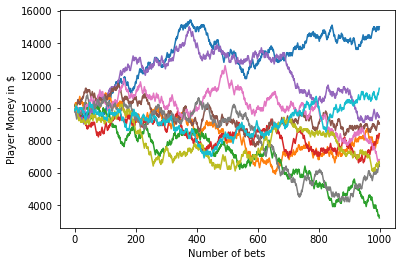

In [13]:
#Create a list for calculating final funds
final_funds= []

#Run 10 iterations :
for i in range(10):
    ending_fund = play(10000,100,1000)

#Print the money the player ends with
print("Number of bets = 1000")
print("The player started with $10,000")
print("The player left with $",str(sum(ending_fund)/len(ending_fund)))

Number of bets = 5000
The player started with $10,000
The player left with $ 680.0


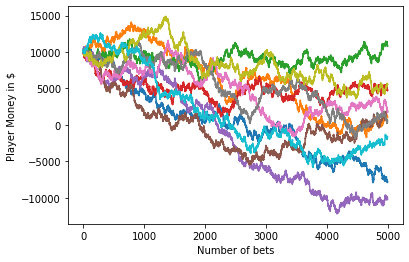

In [14]:
#Create a list for calculating final funds
final_funds= []

#Run 10 iterations :
for i in range(10):
    ending_fund = play(10000,100,5000)

#Print the money the player ends with
print("Number of bets = 5000")
print("The player started with $10,000")
print("The player left with $",str(sum(ending_fund)/len(ending_fund)))

Number of bets = 10000
The player started with $10,000
The player left with $ -4180.0


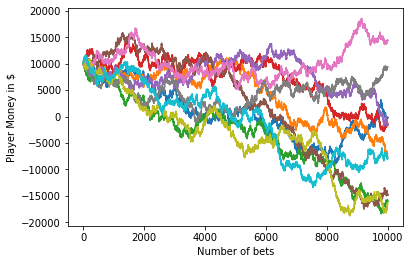

In [15]:
#Create a list for calculating final funds
final_funds= []

#Run 10 iterations :
for i in range(10):
    ending_fund = play(10000,100,10000)

#Print the money the player ends with
print("Number of bets = 10000")
print("The player started with $10,000")
print("The player left with $",str(sum(ending_fund)/len(ending_fund)))

From the above experiment, we can see that the player has a better chance of making a profit if they place fewer bets on these games. In some case scenarios, we get negative numbers, which means that the player lost all of their money and accumulated debt instead of making a profit.

Please keep in mind that these percentages are for our figurative game and they can be modified.

## Conclusion
Like with any forecasting model, the simulation will only be as good as the estimates we make. It is important to remember that the Monte Carlo Simulation only represents probabilities and not certainty. Nevertheless, the Monte Carlo simulation can be a valuable tool when forecasting an unknown future.